In [1]:
cd /home/spotlight/git/deeplearning-seminar/code

/home/spotlight/git/deeplearning-seminar/code


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from Network import VAE

In [6]:
arch = [784,500,200,2]

In [7]:
v = VAE.VAE(arch)

Building tensorflow graph
Done constructing network


In [8]:
import input_data

In [9]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [10]:
v.train(mnist, num_epochs=75, plot_manifold = False)

[**] Begin training: 16:52:39.314894
epoch 0: avg cost: 192.4194655184659
epoch 1: avg cost: 163.78078423295446
epoch 2: avg cost: 156.6252423295455
epoch 3: avg cost: 153.4812973366477
epoch 4: avg cost: 151.3535712357955
epoch 5: avg cost: 149.67863664772705
epoch 6: avg cost: 148.3574677201705
epoch 7: avg cost: 147.16328338068195
epoch 8: avg cost: 146.00692162642048
epoch 9: avg cost: 145.12467102272737
epoch 10: avg cost: 144.28054591619335
epoch 11: avg cost: 143.65718361150567
epoch 12: avg cost: 142.90027709517045
epoch 13: avg cost: 142.36362340198852
epoch 14: avg cost: 141.71489502840913
epoch 15: avg cost: 141.36118082386375
epoch 16: avg cost: 140.92864914772724
epoch 17: avg cost: 140.77254018110793
epoch 18: avg cost: 140.1543079545456
epoch 19: avg cost: 139.90558501420452
epoch 20: avg cost: 139.49612919034098
epoch 21: avg cost: 139.15626775568182
epoch 22: avg cost: 138.90367063210223
epoch 23: avg cost: 138.94217341974428
epoch 24: avg cost: 138.52812981178988
epoc

133.08407130681806

In [169]:
decoded = v.decode()

In [57]:
decoded.shape

(1, 784)

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [14]:
x,y = mnist.test.next_batch(1)

In [17]:
z_mean, z_log_sigma = v.encode(x)

In [94]:
import matplotlib.mlab as mlab


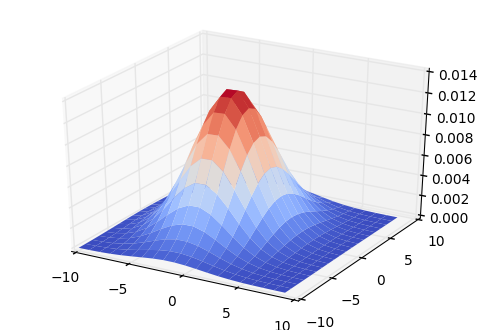

In [258]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, probs, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

In [136]:
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=z_mean.flatten(), cov=np.eye(2)*z_log_sigma**2)

In [257]:
start = -10
end   =  10
step_len = 1
xs = np.arange(start,end,step_len)
ys = np.arange(start,end,step_len)
X,Y = np.meshgrid(xs,ys)
coord = [(x,y) for x in xs for y in xs]
probs = var.pdf(coord).reshape(X.shape)

In [240]:
print(X.shape)
print(Y.shape)
print(len(coord))
print(probs.shape) 

(20, 20)
(20, 20)
400
(20, 20)


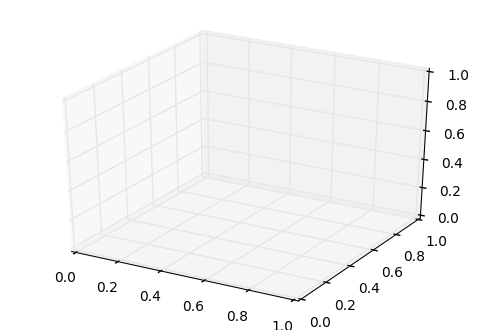

In [215]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [216]:
print(X.shape)
print(Y.shape)
print(Z.shape)

(40, 40)
(40, 40)
(40, 40)
